In [32]:
#importera paket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols


# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars = cars.dropna() # Remove rows containing NaN
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


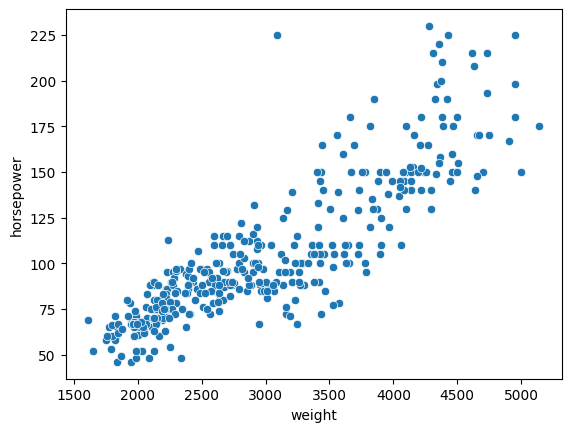

In [33]:
# scatter plot of horsepower versus weight
sns.scatterplot(data=cars,x='weight', y='horsepower')
plt.show()

In [34]:
r,p=scs.pearsonr(cars['horsepower'], cars['weight'])
r, p

(0.8645377375741445, 1.3643468773730233e-118)

### Do regression with state models OLS (Ordinary Least Squares)

Ordinary least squares (OLS) regression is a method that allow us to find a line that  describes the relationship between 1 or more predictor variables and a response variable.

In [35]:
model = ols('horsepower ~ weight', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          1.36e-118
Time:                        00:45:21   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.0

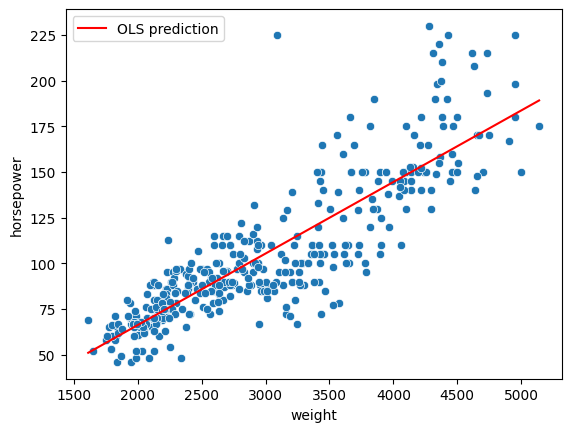

In [36]:
ypred = model.predict(cars['weight']) # in sample predection
scatterplot = sns.scatterplot(data=cars,x='weight', y='horsepower')
scatterplot.plot([cars['weight'].min(), cars['weight'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

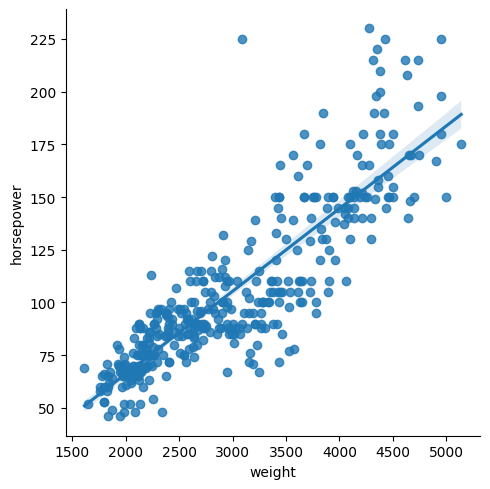

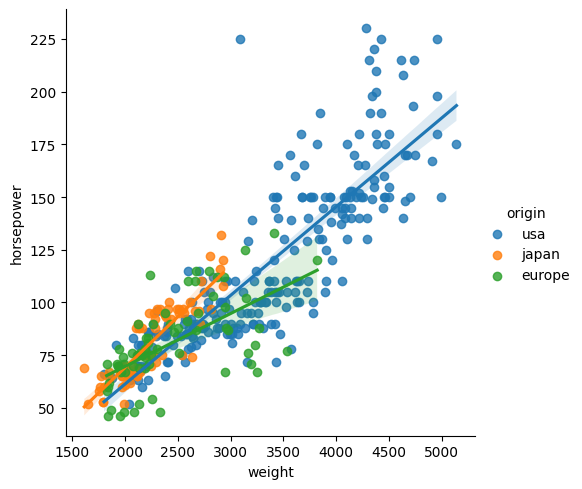

In [37]:
# Show the results of a linear regression

sns.lmplot(data=cars,x='weight', y='horsepower')
sns.lmplot(data=cars,x='weight', y='horsepower', hue='origin')


### Prediction interval in sample prediction

In [42]:
predictions = model.get_prediction(cars['weight'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,86.944448,163.241133
1,94.333094,170.661400
2,84.284923,160.572583
3,84.167576,160.454867
4,84.793410,161.082699
...,...,...
387,58.988360,135.252437
388,33.085503,109.441629
389,39.566712,115.888836
390,52.518144,128.794237


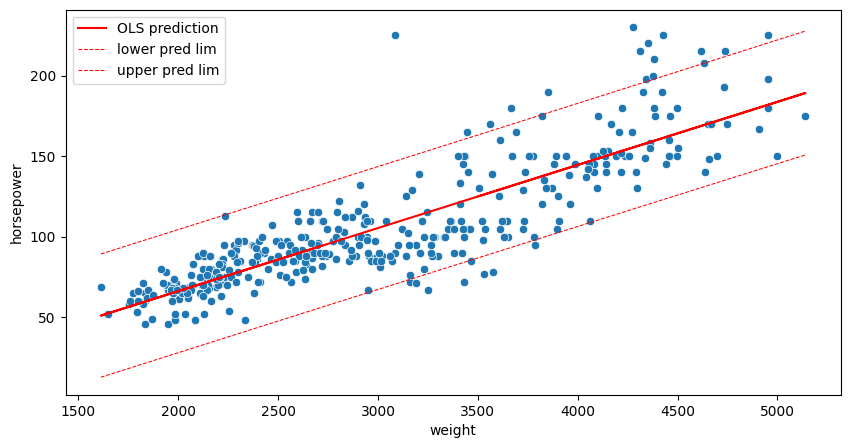

In [43]:
order = np.argsort(cars['weight'])
xs = np.array(cars['weight'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(cars['weight'], ypred, "r", label="OLS prediction")

order = np.argsort(cars['weight'])
x = np.array(cars['weight'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

### Prediction interval out of sample prediction

           weight
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


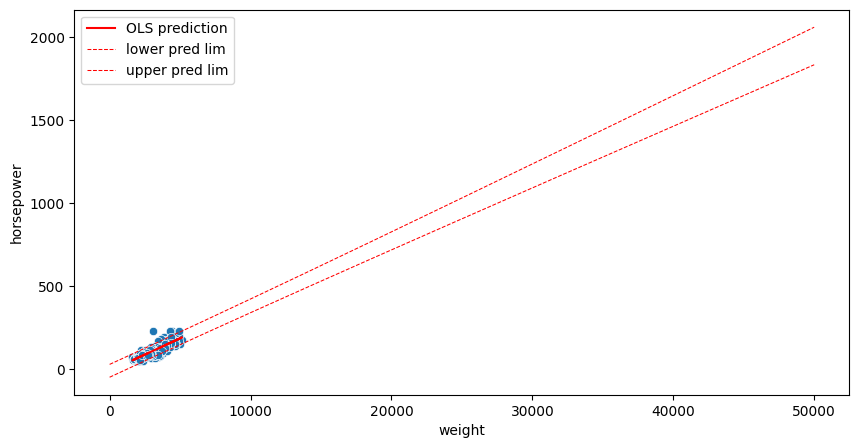

In [45]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['weight'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(cars['weight'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()